## Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import os 
import datetime 

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_counts[application_counts<500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
narrowed_classification_counts = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1]
narrowed_classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts<300].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
#### Confirm the Dtypes of the Dataframe
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [12]:
# Generate our categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
encoded_df = pd.get_dummies(application_df[application_cat])

# Review the DataFrame
encoded_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
#### Merge dummies features and drop the originals
application_df = application_df.merge(encoded_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

<ipython-input-14-419d82c9e9dd>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(['IS_SUCCESSFUL'],1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

<ipython-input-15-91624e387d85>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate Different Models - Optimization

*   Opt Model 1



In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1_opta = 22
hidden_nodes_layer2_opta = 17
hidden_nodes_layer3_opta = 33
hidden_nodes_layer4_opta = 11
nnopt_a = tf.keras.models.Sequential()

# First hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer1_opta, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_opta, activation="relu"))

# Third hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_opta, activation="relu"))

# Fourth hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer4_opta, activation="relu"))

# Output layer
nnopt_a.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nnopt_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 22)                990       
                                                                 
 dense_11 (Dense)            (None, 17)                391       
                                                                 
 dense_12 (Dense)            (None, 33)                594       
                                                                 
 dense_13 (Dense)            (None, 11)                374       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 2,361
Trainable params: 2,361
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Create a callback that saves the model's weights every five epochs
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=5)

In [21]:
# Compile the model
nnopt_a.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [22]:
# Train the model
fit_model = nnopt_a.fit(X_train_scaled, y_train, epochs=50, callbacks=[tensorboard_callback])

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5823 - accuracy: 0.7078
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7273
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7292
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5502 - accuracy: 0.7299
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7306
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7297
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7318
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7308
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7319
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5452 - accuracy: 0.7339

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nnopt_a.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5563 - accuracy: 0.7304 - 522ms/epoch - 2ms/step
Loss: 0.5563216805458069, Accuracy: 0.7303789854049683


In [25]:
# Export our model to HDF5 file
nnopt_a.save('AlphabetSoupCharity_Optimization_A.h5')


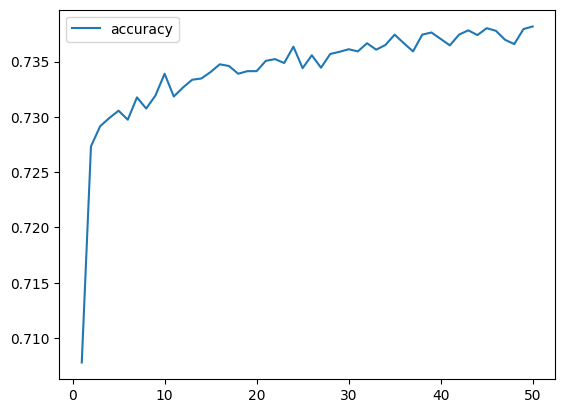

In [26]:
#### Create a DataFrame containing training history
opta_history_df = pd.DataFrame(fit_model.history)
opta_history_df.index += 1

#### Plot the accuracy
opta_accuracy = opta_history_df.plot(y="accuracy")

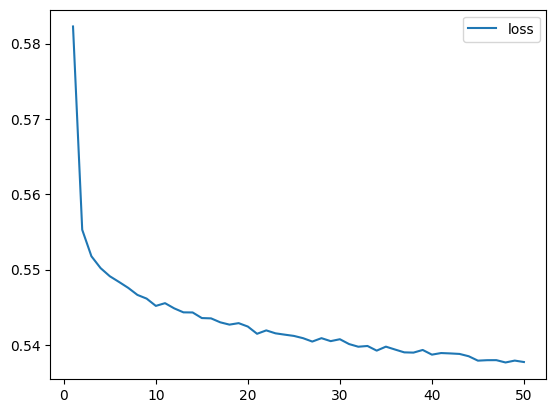

In [27]:
#### Plot the loss
opta_loss = opta_history_df.plot(y="loss")


Opt model 2 

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1_optb = 33
hidden_nodes_layer2_optb = 22
hidden_nodes_layer3_optb = 33
hidden_nodes_layer4_optb = 11
hidden_nodes_layer5_optb = 6
hidden_nodes_layer6_optb = 18
nnopt_b = tf.keras.models.Sequential()

# First hidden layer
nnopt_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer1_optb, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nnopt_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_optb, activation="tanh"))

# Third hidden layer
nnopt_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_optb, activation="tanh"))

# Fourth hidden layer
nnopt_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer4_optb, activation="relu"))

# Fifth hidden layer
nnopt_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer5_optb, activation="relu"))

# Sixth hidden layer
nnopt_b.add(tf.keras.layers.Dense(units=hidden_nodes_layer6_optb, activation="relu"))

# Output layer
nnopt_b.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nnopt_b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 33)                1485      
                                                                 
 dense_16 (Dense)            (None, 22)                748       
                                                                 
 dense_17 (Dense)            (None, 33)                759       
                                                                 
 dense_18 (Dense)            (None, 11)                374       
                                                                 
 dense_19 (Dense)            (None, 6)                 72        
                                                                 
 dense_20 (Dense)            (None, 18)                126       
                                                                 
 dense_21 (Dense)            (None, 1)                

In [32]:
# Compile the model
nnopt_b.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nnopt_b.fit(X_train_scaled, y_train, epochs=200, callbacks=[tensorboard_callback])

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5303 - accuracy: 0.7409
Epoch 2/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5300 - accuracy: 0.7406
Epoch 3/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5300 - accuracy: 0.7408
Epoch 4/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.7420
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5297 - accuracy: 0.7416
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5298 - accuracy: 0.7416
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5299 - accuracy: 0.7414
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.7413
Epoch 9/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7420
Epoch 10/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5298 - accura

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nnopt_b.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5842 - accuracy: 0.7284 - 307ms/epoch - 1ms/step
Loss: 0.5842489004135132, Accuracy: 0.728396475315094


In [35]:
# Export our model to HDF5 file
nnopt_b.save('AlphabetSoupCharity_Optimization_B.h5')

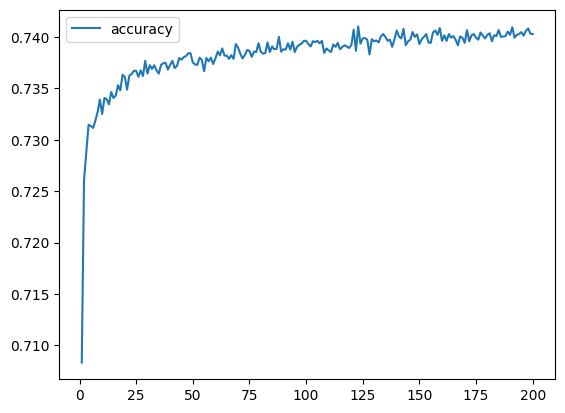

In [44]:
#### Create a DataFrame containing training history
optb_history_df = pd.DataFrame(fit_model.history)
optb_history_df.index += 1

#### Plot the accuracy
optb_accuracy = optb_history_df.plot(y="accuracy")

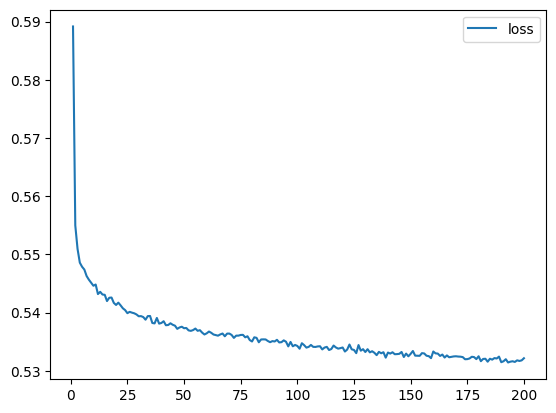

In [45]:
#### Plot the loss
optb_loss = optb_history_df.plot(y="loss")

Opt Model 3

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1_optc = 32
hidden_nodes_layer2_optc = 16
hidden_nodes_layer3_optc = 48
hidden_nodes_layer4_optc = 12
hidden_nodes_layer5_optc = 6
nnopt_c = tf.keras.models.Sequential()

# First hidden layer
nnopt_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer1_optc, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nnopt_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_optc, activation="relu"))

# Third hidden layer
nnopt_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer3_optc, activation="relu"))

# Fourth hidden layer
nnopt_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer4_optc, activation="relu"))

# Fifth hidden layer
nnopt_c.add(tf.keras.layers.Dense(units=hidden_nodes_layer5_optc, activation="relu"))

# Output layer
nnopt_c.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nnopt_c.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                1440      
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 48)                816       
                                                                 
 dense_25 (Dense)            (None, 12)                588       
                                                                 
 dense_26 (Dense)            (None, 6)                 78        
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-traina

In [39]:
# Compile the model
nnopt_c.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nnopt_c.fit(X_train_scaled, y_train, epochs=200, callbacks=[tensorboard_callback])

Epoch 1/200
804/804 [==============================] - 5s 4ms/step - loss: 0.5892 - accuracy: 0.7083
Epoch 2/200
804/804 [==============================] - 4s 5ms/step - loss: 0.5550 - accuracy: 0.7261
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7288
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5486 - accuracy: 0.7315
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7313
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7311
Epoch 7/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5463 - accuracy: 0.7318
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5456 - accuracy: 0.7327
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7339
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5446 - accura

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nnopt_c.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5693 - accuracy: 0.7292 - 366ms/epoch - 1ms/step
Loss: 0.5693467855453491, Accuracy: 0.7292128205299377


In [41]:
# Export our model to HDF5 file
nnopt_c.save('AlphabetSoupCharity_Optimization_C.h5')

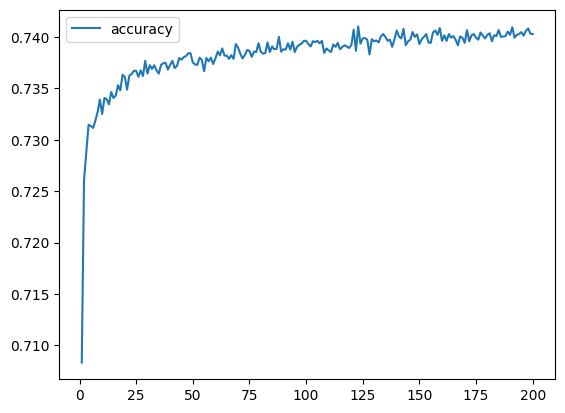

In [42]:
#### Create a DataFrame containing training history
optc_history_df = pd.DataFrame(fit_model.history)
optc_history_df.index += 1

#### Plot the accuracy
optc_accuracy = optc_history_df.plot(y="accuracy")

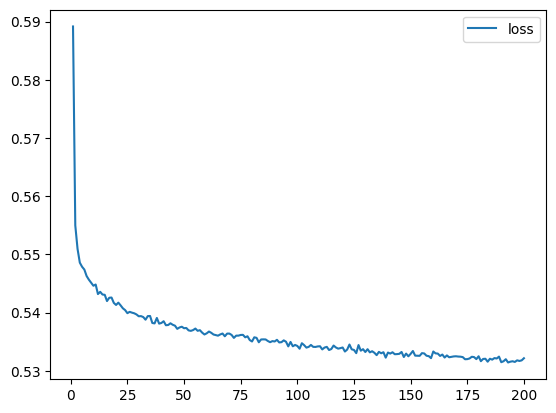

In [43]:
#### Plot the loss
optc_loss = optc_history_df.plot(y="loss")